In [1]:
import sounddevice as sd
import wavio as wv

import matplotlib.pyplot as plt
import matplotlib as mpl

import numpy as np

import serial

from fft_audio import fft_audio

import time

import sys as system

In [2]:
sys = fft_audio()

sys.record_audio()

Say something!


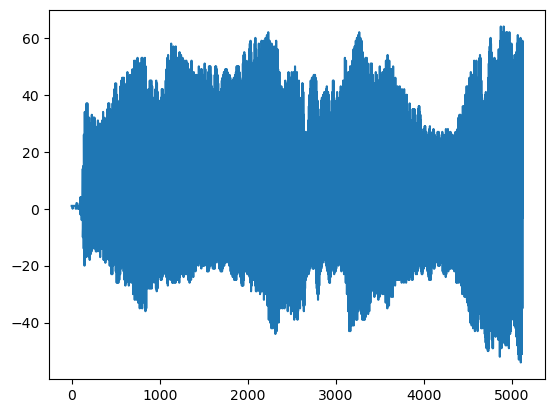

In [3]:
# sys.sig = sys.sig / 2

# sys.sig = np.round(sys.sig)

plt.plot(np.round(sys.sig))

In [26]:
# sys.windlist = np.divide(sys.windlist, 2)

np.max(sys.windlist)

8.0

In [5]:
sys.fft_debug.shape

(32, 158)

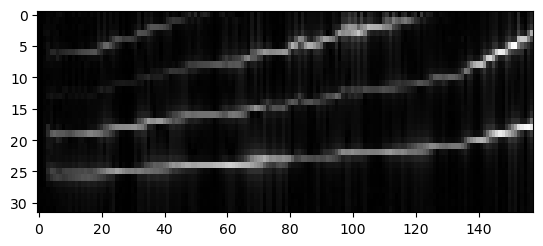

In [4]:
sys.numpy_fft()

In [27]:
sys.fpga_fft()

In [19]:
np.max(sys.fft_fpga_imag)

32512

In [15]:
def send_to_fpga(window):

    sys.ser.write(int("0").to_bytes(2,'big'))

    for d in window:

        sys.ser.write(int(d).to_bytes(2,'big', signed=True))

    for i in range(64):

        sys.ser.write(int("0").to_bytes(2,'big'))

    time.sleep(0.01)

In [64]:
t = np.linspace(0, 2*3.1415,64)

y = (16 * np.sin(4 * t)).astype(int)

# plt.plot(y)

send_to_fpga(y)

In [65]:
raw = []

bytes = sys.ser.read(256)
for i in range(128):
    raw.append(int.from_bytes(bytes[2*i:2*i+2], byteorder=system.byteorder, signed=True))
real = raw[:64]
imag = raw[64:] 
abs = np.sqrt(np.multiply(real, real) + np.multiply(imag, imag))

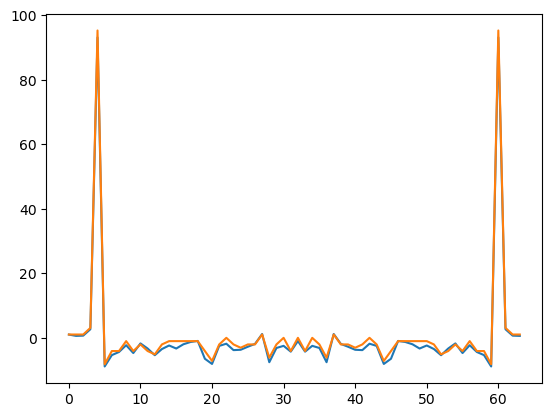

In [66]:
plt.plot(np.fft.fft(y).real)

plt.plot(np.divide(real, 250))

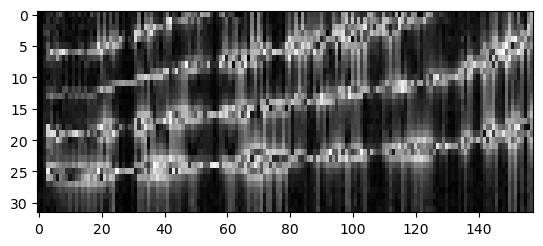

In [6]:
# process data
sys.fft_fpga = np.array(sys.fft_fpga)
sys.fft_fpga = sys.fft_fpga.transpose()
sys.fft_fpga = sys.fft_fpga[sys.half:]
sys.fft_fpga = sys.fft_fpga - np.min(sys.fft_fpga)
sys.fft_fpga = sys.fft_fpga / np.max(sys.fft_fpga)
sys.fft_fpga = sys.fft_fpga * 255
plt.imshow(sys.fft_fpga, cmap='gray', vmin = 0, vmax=255, interpolation='nearest', aspect=2)

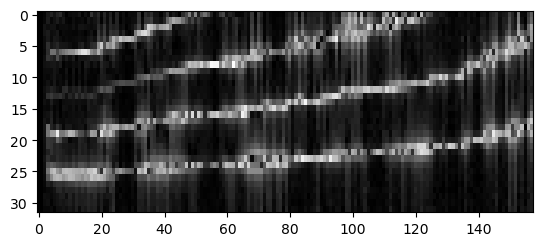

In [17]:
# process data
sys.fft_fpga = np.array(sys.fft_fpga)
sys.fft_fpga = sys.fft_fpga.transpose()
sys.fft_fpga = sys.fft_fpga[sys.half:]
sys.fft_fpga = sys.fft_fpga - np.min(sys.fft_fpga)
sys.fft_fpga = sys.fft_fpga / np.max(sys.fft_fpga)
sys.fft_fpga = sys.fft_fpga * 255
plt.imshow(sys.fft_fpga, cmap='gray', vmin = 0, vmax=255, interpolation='nearest', aspect=2)

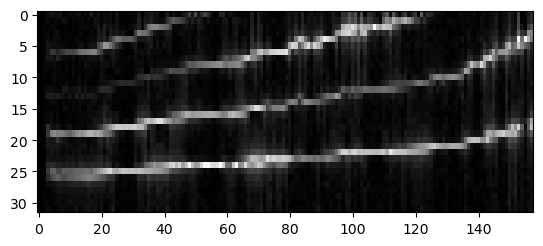

In [23]:
# process data
sys.fft_fpga = np.array(sys.fft_fpga)
sys.fft_fpga = sys.fft_fpga.transpose()
sys.fft_fpga = sys.fft_fpga[sys.half:]
sys.fft_fpga = sys.fft_fpga - np.min(sys.fft_fpga)
sys.fft_fpga = sys.fft_fpga / np.max(sys.fft_fpga)
sys.fft_fpga = sys.fft_fpga * 255
plt.imshow(sys.fft_fpga, cmap='gray', vmin = 0, vmax=255, interpolation='nearest', aspect=2)

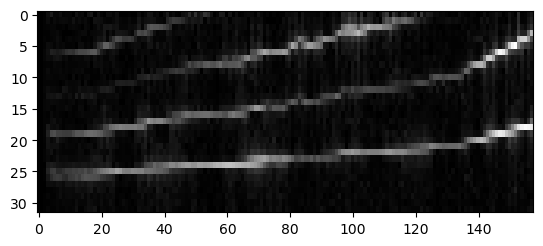

In [28]:
# process data
sys.fft_fpga = np.array(sys.fft_fpga)
sys.fft_fpga = sys.fft_fpga.transpose()
sys.fft_fpga = sys.fft_fpga[sys.half:]
sys.fft_fpga = sys.fft_fpga - np.min(sys.fft_fpga)
sys.fft_fpga = sys.fft_fpga / np.max(sys.fft_fpga)
sys.fft_fpga = sys.fft_fpga * 255
plt.imshow(sys.fft_fpga, cmap='gray', vmin = 0, vmax=255, interpolation='nearest', aspect=2)

In [20]:
sys.ser.write(int(256).to_bytes(2,'big', signed=True))

2

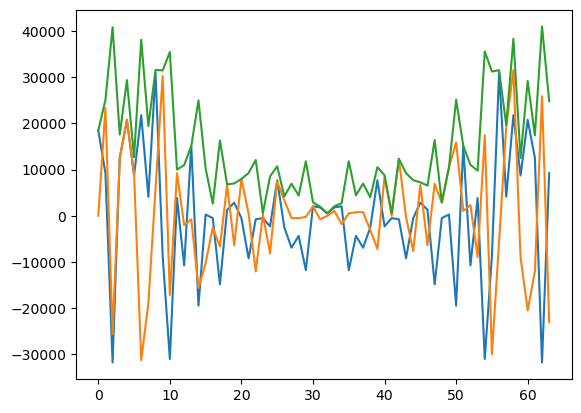

In [18]:
import sys as system

raw = []

for i in range(128):

    raw.append(int.from_bytes(bytes[2*i:2*i+2], byteorder=system.byteorder, signed=True))

real = raw[:64]

imag = raw[64:]

plt.plot(real)
plt.plot(imag)

abs = np.sqrt(np.multiply(real, real) + np.multiply(imag, imag))

plt.plot(abs)

In [11]:
raw[1]

65315

In [8]:
print(sys.ser.read(1))

b''


In [17]:
freq = 1000
duration = 5

sig = sd.rec(int(duration * freq), samplerate = freq, channels = 1, device=2)

sd.wait()

sig = sig.flatten()

In [18]:
sd.play(sig, freq)

In [19]:
windlist = []

index = 0
width = 64
half = 32
max_bits = 12

sig = sig - np.min(sig)
sig = sig / np.max(sig)
sig = 2 * sig - 1
sig = sig * 2 ** max_bits

while (index + width + 1 < len(sig)):

    windlist.append(sig[index : index + width])

    index = index + half



In [20]:
spectrogram = []

index = 0

width = 64

half = int(width/2)

while (index + width < len(sig)):

    # spectrogram.append(np.log(np.fft.fft(sig[index:index+width])[half:]))

    spectrogram.append(np.fft.fft(sig[index:index+width])[half:])

    # plt.plot(np.fft.fft(sig[index:index+width]))

    index = index + half

spectrogram = np.array(spectrogram)

spectrogram = np.absolute(spectrogram)

spectrogram = spectrogram - np.min(spectrogram)

spectrogram = spectrogram / np.max(spectrogram)

spectrogram = spectrogram * 255

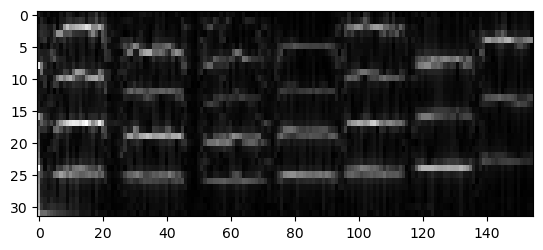

In [21]:
# plt.figure(figsize=(10,10))
plt.imshow(spectrogram.transpose(), cmap='gray', vmin = 0, vmax=255, interpolation='nearest', aspect=2)

In [73]:
rec_fft = np.fft.fft(recording.flatten())

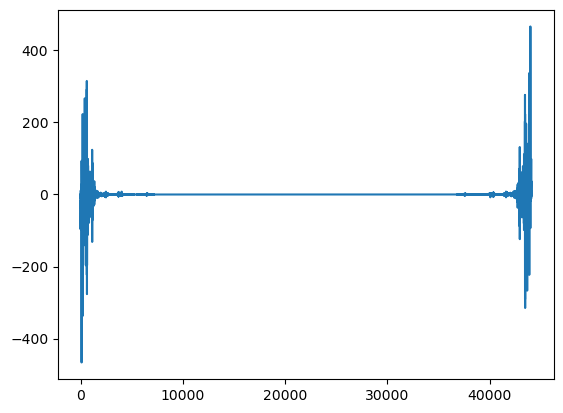

In [75]:
plt.plot(rec_fft.imag)

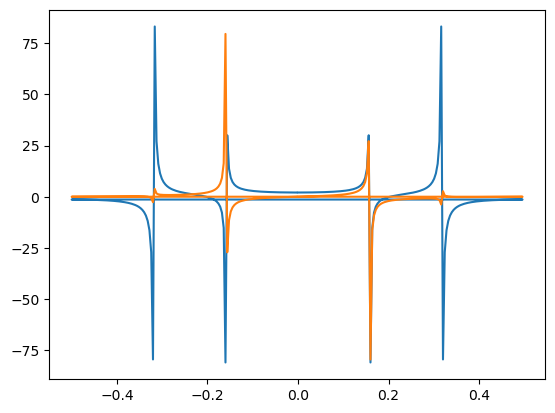

In [66]:
t = np.arange(256)
sp = np.fft.fft(np.sin(t) + np.sin(2 * t))
freq = np.fft.fftfreq(len(t))
plt.plot(freq, sp.real, freq, sp.imag)
plt.show()

In [188]:
sd.query_devices()

   0 Microsoft Sound Mapper - Input, MME (2 in, 0 out)
>  1 Headset Microphone (Oculus Virt, MME (2 in, 0 out)
   2 Headset (LE_WH-CH700N), MME (2 in, 0 out)
   3 Microphone (DroidCam Virtual Au, MME (2 in, 0 out)
   4 Microphone Array (Realtek(R) Au, MME (2 in, 0 out)
   5 AI Noise-cancelling Input (ASUS, MME (2 in, 0 out)
   6 Microsoft Sound Mapper - Output, MME (0 in, 2 out)
<  7 Headphones (LE_WH-CH700N), MME (0 in, 2 out)
   8 Speakers (Realtek(R) Audio), MME (0 in, 2 out)
   9 1 - G34WQC A (AMD High Definiti, MME (0 in, 2 out)
  10 Headphones (Oculus Virtual Audi, MME (0 in, 2 out)
  11 AI Noise-cancelling Output (ASU, MME (0 in, 2 out)
  12 Primary Sound Capture Driver, Windows DirectSound (2 in, 0 out)
  13 Headset Microphone (Oculus Virtual Audio Device), Windows DirectSound (2 in, 0 out)
  14 Headset (LE_WH-CH700N), Windows DirectSound (2 in, 0 out)
  15 Microphone (DroidCam Virtual Audio), Windows DirectSound (2 in, 0 out)
  16 Microphone Array (Realtek(R) Audio), Windows D